# Produisez une étude de marché avec R ou Python

### Sommaire

#### 1.Introduction

#### 2.Nettoyage de données

2.1 Import des libraires

2.2 Travail de nettoyage des données

2.3 Jointure

#### 3.Analyse exploratrice des données

3.1 Gestion des données manquantes 

3.2 Matrice de corrélation

## 1. Introduction

L'entreprise la poule qui chante a pour but de s'exporter à l'international, data analyst au sein de cette entreprise.

Ma mission est de donner des recommandations sur un groupement de pays pour le développement à l’international.

## 2. Nettoyage de données

#### 2.1 Import des librairies

In [1]:
#Import des librairies nécessaire au projet (ajout au fur et à mesure)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import decomposition, preprocessing
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
%pip install yellowbrick
import os
os.environ["OMP_NUM_THREADS"] = "1"

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import des fichiers de travail
dispo_alimentaire = pd.read_csv(r"C:\Users\jogrv\OneDrive\Documents\Openclassroom\Produisez une étude de marché avec R ou Python\DAN-P9-data\DisponibiliteAlimentaire_2017.csv")
population = pd.read_csv(r"C:\Users\jogrv\OneDrive\Documents\Openclassroom\Produisez une étude de marché avec R ou Python\DAN-P9-data\Population_2000_2018.csv")

#### 2.2 Travail de nettoyage des données

Je commence à travailler sur les données fournies par l'entreprise. J'ai décidé de garder uniquement les données pour l'année 2017 car les données concernant la disponibilité alimentaire sont uniquement sur cette année.

Pour le travail préparatoire sur mes tables PIB, stabilité politique, inflation ou encore disponibilité alimentaire j'ai fais un regroupement de ligne pour avoir les valeurs par pays uniquement pour l'année 2017.

##### Disponibilité alimentaire

In [3]:
#Travail sur la table disponibilité alimentaire
#Filtre sur le produit qui nous concerne
dispo_alimentaire = dispo_alimentaire[(dispo_alimentaire['Produit'] == 'Viande de Volailles')].reset_index()

In [4]:
#Garder uniquement les colonnes utiles
dispo_alimentaire = dispo_alimentaire.loc[:,['Zone','Élément','Valeur']]
dispo_alimentaire

,Zone,Élément,Valeur
0,Afghanistan,Production,28.00
1,Afghanistan,Importations - Quantité,29.00
2,Afghanistan,Variation de stock,0.00
3,Afghanistan,Disponibilité intérieure,57.00
4,Afghanistan,Pertes,2.00
...,...,...,...
2056,Zimbabwe,Nourriture,67.00
2057,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,4.68
2058,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),16.00
2059,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,1.59


In [5]:
dispo_alimentaire['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Bélarus', 'Belgique', 'Belize', 'Bénin',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Cabo Verde',
       'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, continentale', 'Chine, Taiwan Province de', 'Chypre',
       'Colombie', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie',
       'Cuba', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équateur', 'Espagne',
       'Estonie', 'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       'Fédération de Russie', 'Fidji', 'Finlande', 'France', 'Gabon',
       'Gambie', 'Géorgie', 'Ghana', 'Grèce', 'Grenade', 'Gu

In [6]:
#Regroupement des lignes 
dispo_alimentaire = pd.crosstab(index=dispo_alimentaire['Zone'], columns=dispo_alimentaire['Élément'], values=dispo_alimentaire['Valeur'], aggfunc='sum')
dispo_alimentaire = dispo_alimentaire.rename_axis(None, axis=1)
dispo_alimentaire

,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,NaN,48.0,0.0,NaN,NaN,-26.0
Équateur,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,NaN,NaN,-1.0
États-Unis d'Amérique,NaN,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,NaN,21914.0,0.0,NaN,77.0,80.0


In [7]:
dispo_alimentaire = dispo_alimentaire.reset_index()
dispo_alimentaire

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,NaN,48.0,0.0,NaN,NaN,-26.0
168,Équateur,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,NaN,NaN,-1.0
169,États-Unis d'Amérique,NaN,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,NaN,21914.0,0.0,NaN,77.0,80.0
170,Éthiopie,0.0,NaN,NaN,0.0,0.13,0.03,0.04,14.0,NaN,1.0,14.0,1.0,14.0,0.0,NaN,NaN,0.0


Je commence la gestion des valeurs manquantes sur la table disponibilité alimentaire, je choisi du supprimer les colonnes avec trop de valeurs manquantes, et qui n'ont pas d'intérêt pour la suite du projet comme l'alimentation pour animaux et les semences.

Pour les autres colonnes avec des valeurs manquantes, qui peuvent être utiles, je remplace les valeurs manquantes par 0

In [8]:
#Gestion des valeurs manquantes
dispo_alimentaire.isna().mean()

Zone                                                             0.000000
Alimentation pour touristes                                      0.546512
Aliments pour animaux                                            0.994186
Autres utilisations (non alimentaire)                            0.802326
Disponibilité alimentaire (Kcal/personne/jour)                   0.000000
Disponibilité alimentaire en quantité (kg/personne/an)           0.000000
Disponibilité de matière grasse en quantité (g/personne/jour)    0.000000
Disponibilité de protéines en quantité (g/personne/jour)         0.000000
Disponibilité intérieure                                         0.011628
Exportations - Quantité                                          0.215116
Importations - Quantité                                          0.011628
Nourriture                                                       0.011628
Pertes                                                           0.610465
Production                            

In [9]:
#suppression des colonnes contenant trop de valeurs manquantes
del dispo_alimentaire['Aliments pour animaux']
del dispo_alimentaire['Semences']
dispo_alimentaire

,Zone,Alimentation pour touristes,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,0.0
1,Afrique du Sud,0.0,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,0.0
2,Albanie,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,4.0
3,Algérie,0.0,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,0.0
4,Allemagne,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,NaN,NaN,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,NaN,48.0,0.0,NaN,-26.0
168,Équateur,0.0,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,NaN,-1.0
169,États-Unis d'Amérique,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,NaN,21914.0,0.0,77.0,80.0
170,Éthiopie,0.0,NaN,0.0,0.13,0.03,0.04,14.0,NaN,1.0,14.0,1.0,14.0,0.0,NaN,0.0


In [10]:
#Remplacement des valeurs manquantes
dispo_alimentaire.fillna(0, inplace = True)
dispo_alimentaire

,Zone,Alimentation pour touristes,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Traitement,Variation de stock
0,Afghanistan,0.0,0.0,5.0,1.53,0.33,0.54,57.0,0.0,29.0,55.0,2.0,28.0,0.0,0.0,0.0
1,Afrique du Sud,0.0,0.0,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,0.0,0.0
2,Albanie,0.0,0.0,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,0.0,13.0,0.0,0.0,4.0
3,Algérie,0.0,0.0,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,0.0,0.0
4,Allemagne,0.0,0.0,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,0.0,1514.0,-38.0,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,0.0,0.0,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,0.0,48.0,0.0,0.0,-26.0
168,Équateur,0.0,0.0,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,0.0,-1.0
169,États-Unis d'Amérique,0.0,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,0.0,21914.0,0.0,77.0,80.0
170,Éthiopie,0.0,0.0,0.0,0.13,0.03,0.04,14.0,0.0,1.0,14.0,1.0,14.0,0.0,0.0,0.0


##### Population

Sur la table population, je garde uniquement les colonnes nécessaires pour mon analyse exploratrice, je travail également sur les données manquantes, sur cette table il n'y a pas. 

Il y a aussi des noms de pays qui correspondent pas ceux des autres tables, afin de faciliter les jointures, je remplace les noms de ces pays.

In [11]:
#Garder uniquement les colonnes nécessaires
population = population[(population['Année'] == 2017 )].reset_index()
population = population.loc[:,['Zone','Valeur']]
population = population.rename(columns={'Valeur': 'Population'})
population['Population'] = (population['Population']*1000).astype('int64')

In [12]:
#Gestion des valeurs manquantes pour la variable population, aucune à signaler.
population[population.Population.isnull() == True] 

,Zone,Population


In [13]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Zone        236 non-null    object
 1   Population  236 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


In [14]:
population.describe()

,Population
count,2.360000e+02
mean,3.198362e+07
std,1.318949e+08
min,7.930000e+02
25%,3.803032e+05
50%,5.203510e+06
75%,1.930842e+07
max,1.421022e+09


In [15]:
population['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Anguilla', 'Antigua-et-Barbuda',
       'Antilles néerlandaises (ex)', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Aruba', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)',
       'Bonaire, Saint-Eustache et Saba', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Curaçao', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équate

In [16]:
#changement des noms de pays pour faciliter les jointures
population['Zone'] = population['Zone'].replace('Pays-Bas (Royaume des)','Pays-Bas')
population['Zone'] = population['Zone'].replace('Bolivie (État plurinational de)','Bolivie')
population['Zone'] = population['Zone'].replace("Iran (République islamique d')",'Iran')
population['Zone'] = population['Zone'].replace('Micronésie (États fédérés de)','Micronésie')
population['Zone'] = population['Zone'].replace('Venezuela (République bolivarienne du)','Venezuela')
population['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Anguilla', 'Antigua-et-Barbuda',
       'Antilles néerlandaises (ex)', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Aruba', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan', 'Bolivie',
       'Bonaire, Saint-Eustache et Saba', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Curaçao', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équateur', 'Érythrée',
       'Espagn

In [17]:
population

,Zone,Population
0,Afghanistan,36296113
1,Afrique du Sud,57009756
2,Albanie,2884169
3,Algérie,41389189
4,Allemagne,82658409
...,...,...
231,Venezuela,29402484
232,Viet Nam,94600648
233,Yémen,27834819
234,Zambie,16853599


In [18]:
#import stabilite politique
stabilite_po = pd.read_csv(r"C:\Users\jogrv\OneDrive\Documents\Openclassroom\Produisez une étude de marché avec R ou Python\DAN-P9-data\stabilite_politique.csv")
stabilite_po

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2000,2000,indice,1.76,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2002,2002,indice,1.30,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2003,2003,indice,1.16,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2004,2004,indice,1.02,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2005,2005,indice,0.99,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,FS,Données de la sécurité alimentaire,716,Zimbabwe,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.71,X,Ciffre de sources internationales,NaN
4070,FS,Données de la sécurité alimentaire,716,Zimbabwe,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2018,2018,indice,-0.72,X,Ciffre de sources internationales,NaN
4071,FS,Données de la sécurité alimentaire,716,Zimbabwe,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2019,2019,indice,-0.96,X,Ciffre de sources internationales,NaN
4072,FS,Données de la sécurité alimentaire,716,Zimbabwe,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,-1.07,X,Ciffre de sources internationales,NaN


In [19]:
#Gestion de la table stabilité politique
#Garder uniquement les colonnes nécessaires
stabilite_po = stabilite_po.loc[:,['Zone','Année','Valeur']]
stabilite_po

,Zone,Année,Valeur
0,Pays-Bas (Royaume des),2000,1.76
1,Pays-Bas (Royaume des),2002,1.30
2,Pays-Bas (Royaume des),2003,1.16
3,Pays-Bas (Royaume des),2004,1.02
4,Pays-Bas (Royaume des),2005,0.99
...,...,...,...
4069,Zimbabwe,2017,-0.71
4070,Zimbabwe,2018,-0.72
4071,Zimbabwe,2019,-0.96
4072,Zimbabwe,2020,-1.07


In [20]:
#Utilisation de unique pour savoir quel nom de pays est à changer.
stabilite_po['Zone'].unique()

array(['Pays-Bas (Royaume des)', 'Afghanistan', 'Afrique du Sud',
       'Albanie', 'Algérie', 'Allemagne', 'Andorre', 'Angola',
       'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine', 'Arménie',
       'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bahreïn',
       'Bangladesh', 'Barbade', 'Bélarus', 'Belgique', 'Belize', 'Bénin',
       'Bermudes', 'Bhoutan', 'Bolivie (État plurinational de)',
       'Bosnie-Herzégovine', 'Botswana', 'Brésil', 'Brunéi Darussalam',
       'Bulgarie', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chypre', 'Colombie', 'Comores', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba', 'Danemark',
       'Djibouti', 'Dominique', 'Égypte', 'El Salvador',
       'Émirats arabes unis', 'Équateur', 'Érythrée', 'Espagne',
       'Estonie', 'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       'Fédération de Russie', 'Fidji', 'Finlande'

In [21]:
#changement des noms de pays pour faciliter les jointures
stabilite_po['Zone'] = stabilite_po['Zone'].replace('Pays-Bas (Royaume des)','Pays-Bas')
stabilite_po['Zone'] = stabilite_po['Zone'].replace('Bolivie (État plurinational de)','Bolivie')
stabilite_po['Zone'] = stabilite_po['Zone'].replace("Iran (République islamique d')",'Iran')
stabilite_po['Zone'] = stabilite_po['Zone'].replace('Micronésie (États fédérés de)','Micronésie')
stabilite_po['Zone'] = stabilite_po['Zone'].replace('Venezuela (République bolivarienne du)','Venezuela')
stabilite_po['Zone'].unique()

array(['Pays-Bas', 'Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie',
       'Allemagne', 'Andorre', 'Angola', 'Antigua-et-Barbuda',
       'Arabie saoudite', 'Argentine', 'Arménie', 'Australie', 'Autriche',
       'Azerbaïdjan', 'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade',
       'Bélarus', 'Belgique', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie', 'Bosnie-Herzégovine', 'Botswana', 'Brésil',
       'Brunéi Darussalam', 'Bulgarie', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chypre',
       'Colombie', 'Comores', 'Congo', 'Costa Rica', "Côte d'Ivoire",
       'Croatie', 'Cuba', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équateur', 'Érythrée',
       'Espagne', 'Estonie', 'Eswatini', "États-Unis d'Amérique",
       'Éthiopie', 'Fédération de Russie', 'Fidji', 'Finlande', 'France',
       'Gabon', 'Gambie', 'Géorgi

#### Stabilité politique

Je choisis d'intégrer les données sur la stabilité politique, car je trouve que l'information sur la stabilité politique est importante pour savoir dans quelle zone de pays l'entreprise peut s'installer. 

La stabilité politique permet de savoir si le pays est stable et que si l'on décide de s'y implanter, il n'y aura pas de changement de gouvernement.

Je garde uniquement les pays ainsi que la valeur de la stabilité politique, je décide de regrouper les informations par pays avec la moyenne de la stabilité politique.

In [22]:
#focus uniquement sur l'année 2017
stabilite_po = stabilite_po[(stabilite_po['Année'] == 2017 )].reset_index()
stabilite_po

,index,Zone,Année,Valeur
0,16,Pays-Bas,2017,0.92
1,37,Afghanistan,2017,-2.80
2,58,Afrique du Sud,2017,-0.28
3,79,Albanie,2017,0.38
4,100,Algérie,2017,-0.92
...,...,...,...,...
191,3985,Venezuela,2017,-1.27
192,4006,Viet Nam,2017,0.23
193,4027,Yémen,2017,-2.94
194,4048,Zambie,2017,0.15


In [23]:
#regroupement des lignes
stabilite_po = pd.crosstab(index=stabilite_po['Zone'], columns=stabilite_po['Année'], values=stabilite_po['Valeur'], aggfunc='sum')
stabilite_po = stabilite_po.rename_axis(None, axis=1)
stabilite_po

,2017
Zone,
Afghanistan,-2.80
Afrique du Sud,-0.28
Albanie,0.38
Algérie,-0.92
Allemagne,0.59
...,...
Érythrée,-0.73
États-Unis d'Amérique,0.29
Éthiopie,-1.68


In [24]:
#utilisation de reset_index avoir les colonnes et leur titre
stabilite_po = stabilite_po.reset_index()
stabilite_po

,Zone,2017
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59
...,...,...
191,Érythrée,-0.73
192,États-Unis d'Amérique,0.29
193,Éthiopie,-1.68
194,Îles Marshall,0.87


In [25]:
#changement du nom de la colonne 2017
stabilite_po.columns=['Zone','stabilite_politique']
stabilite_po

,Zone,stabilite_politique
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59
...,...,...
191,Érythrée,-0.73
192,États-Unis d'Amérique,0.29
193,Éthiopie,-1.68
194,Îles Marshall,0.87


#### PIB

Deuxième import de données, je choisis le PIB. Cette donnée représente la valeur totale des biens et services produits dans une économie donnée sur une période spécifique.

Je travaille sur l'année 2017, comme pour les données précédentes. Je travaille sur les noms de pays pour faciliter les jointures, je garde uniquement les pays et la valeur du PIB.

Le PIB est souvent utilisé comme indicateur de la croissance économique d’un pays.

In [26]:
#Import du fichier PIB
pib = pd.read_csv(r"C:\Users\jogrv\OneDrive\Documents\Openclassroom\Produisez une étude de marché avec R ou Python\DAN-P9-data\PIB_2017.csv")
pib

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,55088.6,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2096.1,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13950.5,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,8,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,12771.0,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,12,Algérie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,11809.5,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,FS,Données de la sécurité alimentaire,858,Uruguay,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,23107.0,X,Ciffre de sources internationales,NaN
183,FS,Données de la sécurité alimentaire,548,Vanuatu,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,3031.2,X,Ciffre de sources internationales,NaN
184,FS,Données de la sécurité alimentaire,704,Viet Nam,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,9050.7,X,Ciffre de sources internationales,NaN
185,FS,Données de la sécurité alimentaire,894,Zambie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,3395.5,X,Ciffre de sources internationales,NaN


In [27]:
#Garder uniquement les colonnes nécessaires
pib = pib.loc[:,['Zone','Année','Valeur']]
pib

,Zone,Année,Valeur
0,Pays-Bas (Royaume des),2017,55088.6
1,Afghanistan,2017,2096.1
2,Afrique du Sud,2017,13950.5
3,Albanie,2017,12771.0
4,Algérie,2017,11809.5
...,...,...,...
182,Uruguay,2017,23107.0
183,Vanuatu,2017,3031.2
184,Viet Nam,2017,9050.7
185,Zambie,2017,3395.5


In [28]:
#Mise en forme de la table pour avoir une valeur par pays.
pib = pd.crosstab(index=pib['Zone'], columns=pib['Année'], values=pib['Valeur'], aggfunc='sum')
pib = pib.rename_axis(None, axis=1)
pib

,2017
Zone,
Afghanistan,2096.1
Afrique du Sud,13950.5
Albanie,12771.0
Algérie,11809.5
Allemagne,53071.5
...,...
Équateur,11679.4
États-Unis d'Amérique,59914.8
Éthiopie,1988.0


In [29]:
pib = pib.reset_index()
pib

,Zone,2017
0,Afghanistan,2096.1
1,Afrique du Sud,13950.5
2,Albanie,12771.0
3,Algérie,11809.5
4,Allemagne,53071.5
...,...,...
182,Équateur,11679.4
183,États-Unis d'Amérique,59914.8
184,Éthiopie,1988.0
185,Îles Marshall,4634.9


In [30]:
pib['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bahreïn', 'Bangladesh', 'Barbade', 'Belgique', 'Belize',
       'Bermudes', 'Bhoutan', 'Bolivie (État plurinational de)',
       'Bosnie-Herzégovine', 'Botswana', 'Brunéi Darussalam', 'Brésil',
       'Bulgarie', 'Burkina Faso', 'Burundi', 'Bélarus', 'Bénin',
       'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, continentale', 'Chypre', 'Colombie', 'Comores', 'Congo',
       'Costa Rica', 'Croatie', "Côte d'Ivoire", 'Danemark', 'Djibouti',
       'Dominique', 'El Salvador', 'Espagne', 'Estonie', 'Eswatini',
       'Fidji', 'Finlande', 'France', 'Fédération de Russie', 'Gabon',
       'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée équatoriale', 'Guinée-Bis

In [31]:
#changement des noms de pays pour faciliter les jointures
pib['Zone'] = pib['Zone'].replace('Pays-Bas (Royaume des)','Pays-Bas')
pib['Zone'] = pib['Zone'].replace('Bolivie (État plurinational de)','Bolivie')
pib['Zone'] = pib['Zone'].replace("Iran (République islamique d')",'Iran')
pib['Zone'] = pib['Zone'].replace('Micronésie (États fédérés de)','Micronésie')
pib['Zone'] = pib['Zone'].replace('Venezuela (République bolivarienne du)','Venezuela')
print(pib['Zone'])

0                Afghanistan
1             Afrique du Sud
2                    Albanie
3                    Algérie
4                  Allemagne
               ...          
182                 Équateur
183    États-Unis d'Amérique
184                 Éthiopie
185            Îles Marshall
186             Îles Salomon
Name: Zone, Length: 187, dtype: object


In [32]:
pib['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bahreïn', 'Bangladesh', 'Barbade', 'Belgique', 'Belize',
       'Bermudes', 'Bhoutan', 'Bolivie', 'Bosnie-Herzégovine', 'Botswana',
       'Brunéi Darussalam', 'Brésil', 'Bulgarie', 'Burkina Faso',
       'Burundi', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale', 'Chypre',
       'Colombie', 'Comores', 'Congo', 'Costa Rica', 'Croatie',
       "Côte d'Ivoire", 'Danemark', 'Djibouti', 'Dominique',
       'El Salvador', 'Espagne', 'Estonie', 'Eswatini', 'Fidji',
       'Finlande', 'France', 'Fédération de Russie', 'Gabon', 'Gambie',
       'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée équatoriale', 'Guinée-Bissau', 'Guyana', 'Géorgie

In [33]:
#changement du nom de la colonne 2017
pib.columns=['Zone','pib']
pib

,Zone,pib
0,Afghanistan,2096.1
1,Afrique du Sud,13950.5
2,Albanie,12771.0
3,Algérie,11809.5
4,Allemagne,53071.5
...,...,...
182,Équateur,11679.4
183,États-Unis d'Amérique,59914.8
184,Éthiopie,1988.0
185,Îles Marshall,4634.9


#### Recherche et développement sur l'agriculture

Cette table était intéressante à première vue, je vais travailler sur les données.

In [34]:
#Import des données R&D sur l'agriculture
rd_agriculture = pd.read_csv(r"C:\Users\jogrv\OneDrive\Documents\Openclassroom\Produisez une étude de marché avec R ou Python\DAN-P9-data\R&D_agriculture_2017.csv")
rd_agriculture

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,IG,Dépenses publiques,710,Afrique du Sud,6110,Valeur US $,23143,"R–D concernant l’agriculture, la sylviculture,...",2017,2017,Millions d’USD,159.37,A,Chiffre officiel,Consolidated General Government Expenditure
1,IG,Dépenses publiques,8,Albanie,6110,Valeur US $,23143,"R–D concernant l’agriculture, la sylviculture,...",2017,2017,Millions d’USD,1.80,A,Chiffre officiel,Consolidated General Government Expenditure
2,IG,Dépenses publiques,24,Angola,6110,Valeur US $,23143,"R–D concernant l’agriculture, la sylviculture,...",2017,2017,Millions d’USD,0.00,A,Chiffre officiel,Consolidated General Government Expenditure
3,IG,Dépenses publiques,51,Arménie,6110,Valeur US $,23143,"R–D concernant l’agriculture, la sylviculture,...",2017,2017,Millions d’USD,0.00,A,Chiffre officiel,Consolidated General Government Expenditure
4,IG,Dépenses publiques,36,Australie,6110,Valeur US $,23143,"R–D concernant l’agriculture, la sylviculture,...",2017,2017,Millions d’USD,24.53,A,Chiffre officiel,Consolidated General Government Expenditure
5,IG,Dépenses publiques,152,Chili,6110,Valeur US $,23143,"R–D concernant l’agriculture, la sylviculture,...",2017,2017,Millions d’USD,57.43,A,Chiffre officiel,Consolidated General Government Expenditure
6,IG,Dépenses publiques,208,Danemark,6110,Valeur US $,23143,"R–D concernant l’agriculture, la sylviculture,...",2017,2017,Millions d’USD,19.84,A,Chiffre officiel,Consolidated General Government Expenditure
7,IG,Dépenses publiques,818,Égypte,6110,Valeur US $,23143,"R–D concernant l’agriculture, la sylviculture,...",2017,2017,Millions d’USD,125.97,A,Chiffre officiel,Consolidated General Government Expenditure
8,IG,Dépenses publiques,643,Fédération de Russie,6110,Valeur US $,23143,"R–D concernant l’agriculture, la sylviculture,...",2017,2017,Millions d’USD,92.58,A,Chiffre officiel,Consolidated General Government Expenditure
9,IG,Dépenses publiques,352,Islande,6110,Valeur US $,23143,"R–D concernant l’agriculture, la sylviculture,...",2017,2017,Millions d’USD,52.87,A,Chiffre officiel,Consolidated General Government Expenditure


In [35]:
#garder les colonnes uniquement nécessaire
#Après avoir travaillé sur les données, je ne vais pas les garder car il en manque.
rd_agriculture = rd_agriculture.loc[:,['Zone','Année','Valeur']]
rd_agriculture

,Zone,Année,Valeur
0,Afrique du Sud,2017,159.37
1,Albanie,2017,1.80
2,Angola,2017,0.00
3,Arménie,2017,0.00
4,Australie,2017,24.53
5,Chili,2017,57.43
6,Danemark,2017,19.84
7,Égypte,2017,125.97
8,Fédération de Russie,2017,92.58
9,Islande,2017,52.87


22 pays avec l'information, je décide de ne pas garder cette table.

#### Inflation

Je choisis de rajouter les données sur l'inflation.

L’inflation peut se définir comme une baisse de la valeur de la monnaie par excès de production de cette dernière, et qui de facto entraine une hausse des prix.

Cette information est importante selon moi pour le choix d'une zone de pays, car elle permet de voir le pouvoir d'achat de la population au sein de ces pays.

In [36]:
#Import inflation
inflation_2017 = pd.read_csv(r"C:\Users\jogrv\OneDrive\Documents\Openclassroom\Produisez une étude de marché avec R ou Python\DAN-P9-data\inflation_2017.csv")
inflation_2017

,Code Domaine,Domaine,Code zone (M49),Zone,Code année,Année,Code Produit,Produit,Code Mois,Mois,Code Élément,Élément,Unité,Valeur,Symbole,Description du Symbole,Note
0,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7001,Janvier,6121,Valeur,%,4.730651,E,Valeur estimée,NaN
1,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7002,Février,6121,Valeur,%,4.553673,E,Valeur estimée,NaN
2,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7003,Mars,6121,Valeur,%,10.028383,E,Valeur estimée,NaN
3,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7004,Avril,6121,Valeur,%,9.367880,E,Valeur estimée,NaN
4,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7005,Mai,6121,Valeur,%,10.723921,E,Valeur estimée,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431,CP,Indices de Prix à la Consommation,716,Zimbabwe,2017,2017,23014,Food price inflation,7008,Août,6121,Valeur,%,1.838235,E,Valeur estimée,NaN
2432,CP,Indices de Prix à la Consommation,716,Zimbabwe,2017,2017,23014,Food price inflation,7009,Septembre,6121,Valeur,%,2.573529,E,Valeur estimée,NaN
2433,CP,Indices de Prix à la Consommation,716,Zimbabwe,2017,2017,23014,Food price inflation,7010,Octobre,6121,Valeur,%,4.395604,E,Valeur estimée,NaN
2434,CP,Indices de Prix à la Consommation,716,Zimbabwe,2017,2017,23014,Food price inflation,7011,Novembre,6121,Valeur,%,5.646630,E,Valeur estimée,NaN


In [37]:
#Garder les colonnes uniquement utiles
inflation_2017 = inflation_2017.loc[:,['Zone','Année','Valeur']]
inflation_2017

,Zone,Année,Valeur
0,Afghanistan,2017,4.730651
1,Afghanistan,2017,4.553673
2,Afghanistan,2017,10.028383
3,Afghanistan,2017,9.367880
4,Afghanistan,2017,10.723921
...,...,...,...
2431,Zimbabwe,2017,1.838235
2432,Zimbabwe,2017,2.573529
2433,Zimbabwe,2017,4.395604
2434,Zimbabwe,2017,5.646630


In [38]:
#Regroupement des lignes, on garde uniquement la moyenne des valeurs.
inflation_2017 = pd.crosstab(index=inflation_2017['Zone'], columns=inflation_2017['Année'], values=inflation_2017['Valeur'], aggfunc='mean')
inflation_2017 = inflation_2017.rename_axis(None, axis=1)
inflation_2017

,2017
Zone,
Afghanistan,6.957529
Afrique du Sud,6.902628
Albanie,3.924577
Algérie,5.040496
Allemagne,2.762497
...,...
Îles Caïmanes,0.735739
Îles Cook,0.635873
Îles Salomon,-0.649605


In [39]:
inflation_2017 = inflation_2017.reset_index()
inflation_2017

,Zone,2017
0,Afghanistan,6.957529
1,Afrique du Sud,6.902628
2,Albanie,3.924577
3,Algérie,5.040496
4,Allemagne,2.762497
...,...,...
198,Îles Caïmanes,0.735739
199,Îles Cook,0.635873
200,Îles Salomon,-0.649605
201,Îles Vierges britanniques,-1.825296


In [40]:
inflation_2017['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Anguilla', 'Antigua-et-Barbuda',
       'Arabie saoudite', 'Argentine', 'Arménie', 'Aruba', 'Australie',
       'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bahreïn', 'Bangladesh',
       'Barbade', 'Belgique', 'Belize', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brunéi Darussalam', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Bélarus', 'Bénin', 'Cabo Verde',
       'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, continentale', 'Chypre', 'Colombie', 'Comores', 'Congo',
       'Costa Rica', 'Croatie', 'Curaçao', "Côte d'Ivoire", 'Danemark',
       'Djibouti', 'Dominique', 'El Salvador', 'Espagne', 'Estonie',
       'Eswatini', 'Fidji', 'Finlande', 'France', 'Fédération de Russie',
       'Gabon', 'Gambie', 'Ghana', 'Grenade', 'Groenland', 'Grèce',


In [41]:
#changement des noms de pays pour faciliter les jointures
inflation_2017['Zone'] = inflation_2017['Zone'].replace('Pays-Bas (Royaume des)','Pays-Bas')
inflation_2017['Zone'] = inflation_2017['Zone'].replace('Bolivie (État plurinational de)','Bolivie')
inflation_2017['Zone'] = inflation_2017['Zone'].replace("Iran (République islamique d')",'Iran')
inflation_2017['Zone'] = inflation_2017['Zone'].replace('Micronésie (États fédérés de)','Micronésie')
inflation_2017['Zone'] = inflation_2017['Zone'].replace('Venezuela (République bolivarienne du)','Venezuela')
inflation_2017['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Anguilla', 'Antigua-et-Barbuda',
       'Arabie saoudite', 'Argentine', 'Arménie', 'Aruba', 'Australie',
       'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bahreïn', 'Bangladesh',
       'Barbade', 'Belgique', 'Belize', 'Bermudes', 'Bhoutan', 'Bolivie',
       'Bosnie-Herzégovine', 'Botswana', 'Brunéi Darussalam', 'Brésil',
       'Bulgarie', 'Burkina Faso', 'Burundi', 'Bélarus', 'Bénin',
       'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, continentale', 'Chypre', 'Colombie', 'Comores', 'Congo',
       'Costa Rica', 'Croatie', 'Curaçao', "Côte d'Ivoire", 'Danemark',
       'Djibouti', 'Dominique', 'El Salvador', 'Espagne', 'Estonie',
       'Eswatini', 'Fidji', 'Finlande', 'France', 'Fédération de Russie',
       'Gabon', 'Gambie', 'Ghana', 'Grenade', 'Groenland', 'Grèce',
       'Guadeloupe', 'Guam', 'G

In [42]:
#changement du nom de la colonne 2017
inflation_2017.columns=['Zone','inflation']
inflation_2017

,Zone,inflation
0,Afghanistan,6.957529
1,Afrique du Sud,6.902628
2,Albanie,3.924577
3,Algérie,5.040496
4,Allemagne,2.762497
...,...,...
198,Îles Caïmanes,0.735739
199,Îles Cook,0.635873
200,Îles Salomon,-0.649605
201,Îles Vierges britanniques,-1.825296


## 2.3 Jointure

Je commence le travail de jointure de ces différentes tables de données afin d'avoir une table englobent toutes ces données, et qui facilitera mon analyse.

Au cours des différentes jointures, il peut y avoir des informations que je ne vais pas garder, car celles-ci ne sont pas forcément pertinentes.

In [43]:
#Jointure
jointure1 = pd.merge(left=inflation_2017, right=pib, how='outer', on=['Zone'], indicator=True)
jointure1

,Zone,inflation,pib,_merge
0,Afghanistan,6.957529,2096.1,both
1,Afrique du Sud,6.902628,13950.5,both
2,Albanie,3.924577,12771.0,both
3,Algérie,5.040496,11809.5,both
4,Allemagne,2.762497,53071.5,both
...,...,...,...,...
204,Nauru,NaN,11746.6,right_only
205,République centrafricaine,NaN,839.6,right_only
206,Turkménistan,NaN,13703.5,right_only
207,Tuvalu,NaN,4208.9,right_only


In [44]:
#voir les pays qui ont pas l'information
#faire un choix de pays
jointure1.loc[jointure1['_merge'] != 'both']

,Zone,inflation,pib,_merge
5,Andorre,2.886726,NaN,left_only
7,Anguilla,1.203278,NaN,left_only
12,Aruba,-1.999478,NaN,left_only
48,Curaçao,1.688693,NaN,left_only
65,Groenland,2.191969,NaN,left_only
67,Guadeloupe,1.468704,NaN,left_only
68,Guam,-2.007091,NaN,left_only
73,Guyane française,0.644719,NaN,left_only
109,Martinique,1.148400,NaN,left_only
115,Montserrat,-0.285355,NaN,left_only


In [45]:
#Garder les both, car c'est là où nous avons toutes les informations.
#jointure1 = jointure1.loc[jointure1['_merge']=='both']
del jointure1['_merge'] 
jointure1

,Zone,inflation,pib
0,Afghanistan,6.957529,2096.1
1,Afrique du Sud,6.902628,13950.5
2,Albanie,3.924577,12771.0
3,Algérie,5.040496,11809.5
4,Allemagne,2.762497,53071.5
...,...,...,...
204,Nauru,NaN,11746.6
205,République centrafricaine,NaN,839.6
206,Turkménistan,NaN,13703.5
207,Tuvalu,NaN,4208.9


In [46]:
#jointure suivante
jointure2 = pd.merge(left=jointure1, right=population, how='outer',on=['Zone'], indicator = True)
jointure2

,Zone,inflation,pib,Population,_merge
0,Afghanistan,6.957529,2096.1,36296113.0,both
1,Afrique du Sud,6.902628,13950.5,57009756.0,both
2,Albanie,3.924577,12771.0,2884169.0,both
3,Algérie,5.040496,11809.5,41389189.0,both
4,Allemagne,2.762497,53071.5,82658409.0,both
...,...,...,...,...,...
232,Saint-Pierre-et-Miquelon,NaN,NaN,5887.0,right_only
233,Saint-Siège,NaN,NaN,793.0,right_only
234,Samoa américaines,NaN,NaN,55620.0,right_only
235,Sint Maarten (partie néerlandaise),NaN,NaN,41444.0,right_only


In [47]:
#voir les pays qui ont pas l'information
#faire un choix de pays
jointure2.loc[jointure2['_merge'] != 'both']

,Zone,inflation,pib,Population,_merge
202,Îles d'Åland,0.54915,NaN,NaN,left_only
209,Antilles néerlandaises (ex),NaN,NaN,275186.0,right_only
210,"Bonaire, Saint-Eustache et Saba",NaN,NaN,25401.0,right_only
211,"Chine, Taiwan Province de",NaN,NaN,23674546.0,right_only
212,Cuba,NaN,NaN,11339254.0,right_only
213,Érythrée,NaN,NaN,3412893.0,right_only
214,Gibraltar,NaN,NaN,33728.0,right_only
215,Île de Man,NaN,NaN,83598.0,right_only
216,Îles Anglo-Normandes,NaN,NaN,168665.0,right_only
217,Îles Falkland (Malvinas),NaN,NaN,3068.0,right_only


In [48]:
#Garder les both car c'est là où nous avons toutes les informations
jointure2 = jointure2.loc[jointure2['_merge']=='both']
del jointure2['_merge'] 
jointure2

,Zone,inflation,pib,Population
0,Afghanistan,6.957529,2096.1,36296113.0
1,Afrique du Sud,6.902628,13950.5,57009756.0
2,Albanie,3.924577,12771.0,2884169.0
3,Algérie,5.040496,11809.5,41389189.0
4,Allemagne,2.762497,53071.5,82658409.0
...,...,...,...,...
204,Nauru,NaN,11746.6,10573.0
205,République centrafricaine,NaN,839.6,4596023.0
206,Turkménistan,NaN,13703.5,5757667.0
207,Tuvalu,NaN,4208.9,11370.0


In [49]:
#Faire la jointure stabilité politique
jointure3 = pd.merge(left=jointure2, right=stabilite_po, how='outer', on=['Zone'], indicator = True)
jointure3

,Zone,inflation,pib,Population,stabilite_politique,_merge
0,Afghanistan,6.957529,2096.1,36296113.0,-2.80,both
1,Afrique du Sud,6.902628,13950.5,57009756.0,-0.28,both
2,Albanie,3.924577,12771.0,2884169.0,0.38,both
3,Algérie,5.040496,11809.5,41389189.0,-0.92,both
4,Allemagne,2.762497,53071.5,82658409.0,0.59,both
...,...,...,...,...,...,...
207,Îles Marshall,NaN,4634.9,58058.0,0.87,both
208,Cuba,NaN,NaN,NaN,0.65,right_only
209,République populaire démocratique de Corée,NaN,NaN,NaN,-0.50,right_only
210,Samoa américaines,NaN,NaN,NaN,1.22,right_only


In [50]:
jointure3.loc[jointure3['_merge'] != 'both']

,Zone,inflation,pib,Population,stabilite_politique,_merge
7,Anguilla,1.203278,NaN,1.458400e+04,NaN,left_only
12,Aruba,-1.999478,NaN,1.053660e+05,NaN,left_only
41,"Chine, continentale",-0.193079,14243.5,1.421022e+09,NaN,left_only
48,Curaçao,1.688693,NaN,1.619970e+05,NaN,left_only
67,Guadeloupe,1.468704,NaN,3.996720e+05,NaN,left_only
68,Guam,-2.007091,NaN,1.642810e+05,NaN,left_only
73,Guyane française,0.644719,NaN,2.751910e+05,NaN,left_only
109,Martinique,1.148400,NaN,3.759480e+05,NaN,left_only
115,Montserrat,-0.285355,NaN,4.984000e+03,NaN,left_only
124,Nouvelle-Calédonie,1.421287,NaN,2.771500e+05,NaN,left_only


In [51]:
jointure3 = jointure3.loc[jointure3['_merge']=='both']
del jointure3['_merge'] 
jointure3

,Zone,inflation,pib,Population,stabilite_politique
0,Afghanistan,6.957529,2096.1,36296113.0,-2.80
1,Afrique du Sud,6.902628,13950.5,57009756.0,-0.28
2,Albanie,3.924577,12771.0,2884169.0,0.38
3,Algérie,5.040496,11809.5,41389189.0,-0.92
4,Allemagne,2.762497,53071.5,82658409.0,0.59
...,...,...,...,...,...
203,Nauru,NaN,11746.6,10573.0,0.52
204,République centrafricaine,NaN,839.6,4596023.0,-2.01
205,Turkménistan,NaN,13703.5,5757667.0,-0.13
206,Tuvalu,NaN,4208.9,11370.0,1.24


Au cours des différentes jointures, j'ai quelques pays que je ne garde pas, car ce sont des pays qui ne sont pas très intéressant pour l'import/export de poulet. Comme par exemple, les îles ou encore les principautés comme Monaco.

Certains pays supprimés pourront être touchés par la suite, si par exemple nous nous installons à côté de l'un d'eux. 

In [52]:
#Jointure total
jointure_total = pd.merge(left=jointure3, right=dispo_alimentaire, how='outer', on=['Zone'],indicator =True)
jointure_total

,Zone,inflation,pib,Population,stabilite_politique,Alimentation pour touristes,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Traitement,Variation de stock,_merge
0,Afghanistan,6.957529,2096.1,36296113.0,-2.80,0.0,0.0,5.0,1.53,0.33,...,57.0,0.0,29.0,55.0,2.0,28.0,0.0,0.0,0.0,both
1,Afrique du Sud,6.902628,13950.5,57009756.0,-0.28,0.0,0.0,143.0,35.69,9.25,...,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,0.0,0.0,both
2,Albanie,3.924577,12771.0,2884169.0,0.38,0.0,0.0,85.0,16.36,6.45,...,47.0,0.0,38.0,47.0,0.0,13.0,0.0,0.0,4.0,both
3,Algérie,5.040496,11809.5,41389189.0,-0.92,0.0,0.0,22.0,6.38,1.50,...,277.0,0.0,2.0,264.0,13.0,275.0,0.0,0.0,0.0,both
4,Allemagne,2.762497,53071.5,82658409.0,0.59,0.0,0.0,71.0,19.47,4.16,...,1739.0,646.0,842.0,1609.0,0.0,1514.0,-38.0,167.0,-29.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Iran (République islamique d'),NaN,NaN,NaN,NaN,0.0,0.0,96.0,27.52,5.99,...,2220.0,45.0,6.0,2220.0,0.0,2174.0,0.0,0.0,-86.0,right_only
197,Nouvelle-Calédonie,NaN,NaN,NaN,NaN,0.0,0.0,136.0,38.71,8.42,...,11.0,0.0,9.0,11.0,0.0,1.0,0.0,0.0,-1.0,right_only
198,Polynésie française,NaN,NaN,NaN,NaN,2.0,0.0,167.0,47.40,10.86,...,15.0,0.0,15.0,13.0,0.0,1.0,0.0,0.0,0.0,right_only
199,République populaire démocratique de Corée,NaN,NaN,NaN,NaN,0.0,0.0,8.0,1.62,0.63,...,43.0,0.0,0.0,41.0,1.0,43.0,0.0,0.0,0.0,right_only


In [53]:
#voir les pays qui ont pas l'information
#faire un choix de pays, pays bas, chine y'a un probleme d'orthographe.
#Importation, disponilité alimentaire pour certains pays a retrouver comme le Qatar.
jointure_total.loc[jointure_total['_merge'] != 'both']

,Zone,inflation,pib,Population,stabilite_politique,Alimentation pour touristes,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Traitement,Variation de stock,_merge
5,Andorre,2.886726,NaN,77001.0,1.42,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
15,Bahreïn,1.054370,48929.4,1494076.0,-0.96,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,Bermudes,2.233201,81835.0,63049.0,1.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,Bhoutan,7.466797,10986.9,745563.0,1.12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,Bolivie,3.370820,8244.9,11192855.0,-0.28,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
25,Brunéi Darussalam,0.280608,60173.1,424473.0,1.16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
29,Burundi,24.198861,750.8,10827019.0,-2.01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
41,Comores,0.819749,3240.2,813892.0,0.04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
61,Groenland,2.191969,NaN,56481.0,1.92,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
65,Guinée équatoriale,1.605671,19617.8,1262002.0,-0.17,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [54]:
#garder les both car c'est là ou nous avons toutes les informations
jointure_total = jointure_total.loc[jointure_total['_merge']=='both']
del jointure_total['_merge'] 
jointure_total

,Zone,inflation,pib,Population,stabilite_politique,Alimentation pour touristes,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Traitement,Variation de stock
0,Afghanistan,6.957529,2096.1,36296113.0,-2.80,0.0,0.0,5.0,1.53,0.33,0.54,57.0,0.0,29.0,55.0,2.0,28.0,0.0,0.0,0.0
1,Afrique du Sud,6.902628,13950.5,57009756.0,-0.28,0.0,0.0,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,0.0,0.0
2,Albanie,3.924577,12771.0,2884169.0,0.38,0.0,0.0,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,0.0,13.0,0.0,0.0,4.0
3,Algérie,5.040496,11809.5,41389189.0,-0.92,0.0,0.0,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,0.0,0.0
4,Allemagne,2.762497,53071.5,82658409.0,0.59,0.0,0.0,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,0.0,1514.0,-38.0,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Éthiopie,11.285758,1988.0,106399924.0,-1.68,0.0,0.0,0.0,0.13,0.03,0.04,14.0,0.0,1.0,14.0,1.0,14.0,0.0,0.0,0.0
185,Îles Salomon,-0.649605,2625.1,636039.0,0.20,0.0,0.0,18.0,4.45,1.31,1.51,3.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,3.0
186,Guyana,NaN,12193.6,775222.0,-0.04,0.0,2.0,165.0,38.34,12.55,12.33,32.0,0.0,0.0,30.0,0.0,31.0,0.0,0.0,-1.0
188,République centrafricaine,NaN,839.6,4596023.0,-2.01,0.0,0.0,8.0,2.29,0.48,0.78,11.0,0.0,4.0,11.0,0.0,7.0,0.0,0.0,0.0


## 3.Analyse exploratrice

Après la gestion des données, et de la mise en place des jointures, je me retrouve avec une table finale.

Sur cette table, je vais gérer les valeurs manquantes, créer une matrice de corrélation pour voir si les données ne sont pas trop corrélées entres elles pour ne pas avoir de redondances.

#### Gestion données manquantes

In [55]:
#Gestion des valeurs manquantes
jointure_total.isna().sum()

Zone                                                             0
inflation                                                        3
pib                                                              1
Population                                                       0
stabilite_politique                                              0
Alimentation pour touristes                                      0
Autres utilisations (non alimentaire)                            0
Disponibilité alimentaire (Kcal/personne/jour)                   0
Disponibilité alimentaire en quantité (kg/personne/an)           0
Disponibilité de matière grasse en quantité (g/personne/jour)    0
Disponibilité de protéines en quantité (g/personne/jour)         0
Disponibilité intérieure                                         0
Exportations - Quantité                                          0
Importations - Quantité                                          0
Nourriture                                                    

In [56]:
#Voir les données qui manquent
nan_values = jointure_total[jointure_total.isna().any(axis=1)]
nan_values

,Zone,inflation,pib,Population,stabilite_politique,Alimentation pour touristes,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Traitement,Variation de stock
177,Yémen,7.161697,NaN,27834819.0,-2.94,0.0,0.0,30.0,8.53,1.85,3.04,246.0,0.0,78.0,237.0,8.0,168.0,0.0,0.0,0.0
186,Guyana,NaN,12193.6,775222.0,-0.04,0.0,2.0,165.0,38.34,12.55,12.33,32.0,0.0,0.0,30.0,0.0,31.0,0.0,0.0,-1.0
188,République centrafricaine,NaN,839.6,4596023.0,-2.01,0.0,0.0,8.0,2.29,0.48,0.78,11.0,0.0,4.0,11.0,0.0,7.0,0.0,0.0,0.0
189,Turkménistan,NaN,13703.5,5757667.0,-0.13,0.0,0.0,15.0,4.52,0.95,1.53,27.0,0.0,9.0,26.0,1.0,20.0,0.0,0.0,2.0


Je décide d'imputer les valeurs manquantes pour les 4 pays en cherchant ces infos sur le site de la FAO pour ne pas fausser l'analyse.

In [57]:
#Imputation des valeurs manquantes à certains pays
pib_par_pays = {
    'Yémen': 701.7,}
inflation_par_pays = {
    'Guyana': 1.9,  
    'République centrafricaine': 4.2,
    'Turkménistan': 8,
    
}

jointure_total_copy = jointure_total.copy()

jointure_total_copy['pib'].fillna(jointure_total_copy['Zone'].map(pib_par_pays), inplace=True)
jointure_total_copy['inflation'].fillna(jointure_total_copy['Zone'].map(inflation_par_pays), inplace=True)

jointure_total = jointure_total_copy

In [58]:
#Plus de valeurs manquantes pour mon dataframe final.
jointure_total.isnull().sum()

Zone                                                             0
inflation                                                        0
pib                                                              0
Population                                                       0
stabilite_politique                                              0
Alimentation pour touristes                                      0
Autres utilisations (non alimentaire)                            0
Disponibilité alimentaire (Kcal/personne/jour)                   0
Disponibilité alimentaire en quantité (kg/personne/an)           0
Disponibilité de matière grasse en quantité (g/personne/jour)    0
Disponibilité de protéines en quantité (g/personne/jour)         0
Disponibilité intérieure                                         0
Exportations - Quantité                                          0
Importations - Quantité                                          0
Nourriture                                                    

Voilà intégration de ces données manquantes, on constate qu'aucunes données ne manquent, et que l'on peut passer à la suite car l'analyse ne sera pas faussée à cause d'un manque de données.

#### Matrice de corrélation

Je décide d'utiliser la matrice de corrélation afin de savoir quelles variables sont très corrélés entres elles, et de supprimer celles-ci afin de ne pas avoir de redondance de données et d'avoir une analyse faussée.

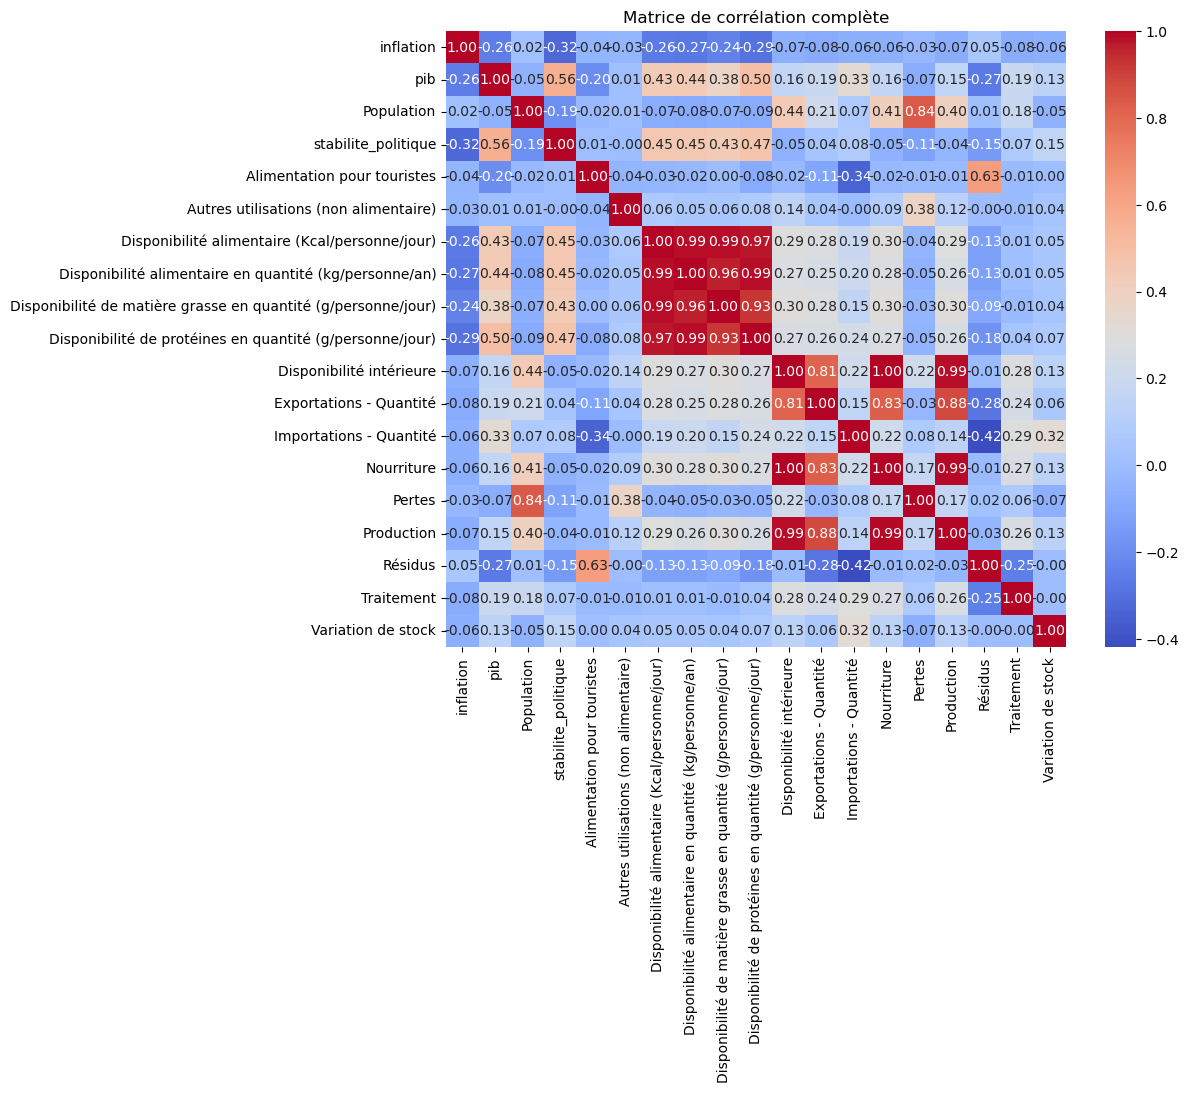

In [59]:
#Calcul de la matrice
correlation_matrix = jointure_total.corr(numeric_only=True)

#Afficher matrice complete
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation complète')
plt.show()

J'utilise le triangle de corrélation car je le trouve encore plus précis et plus lisible.

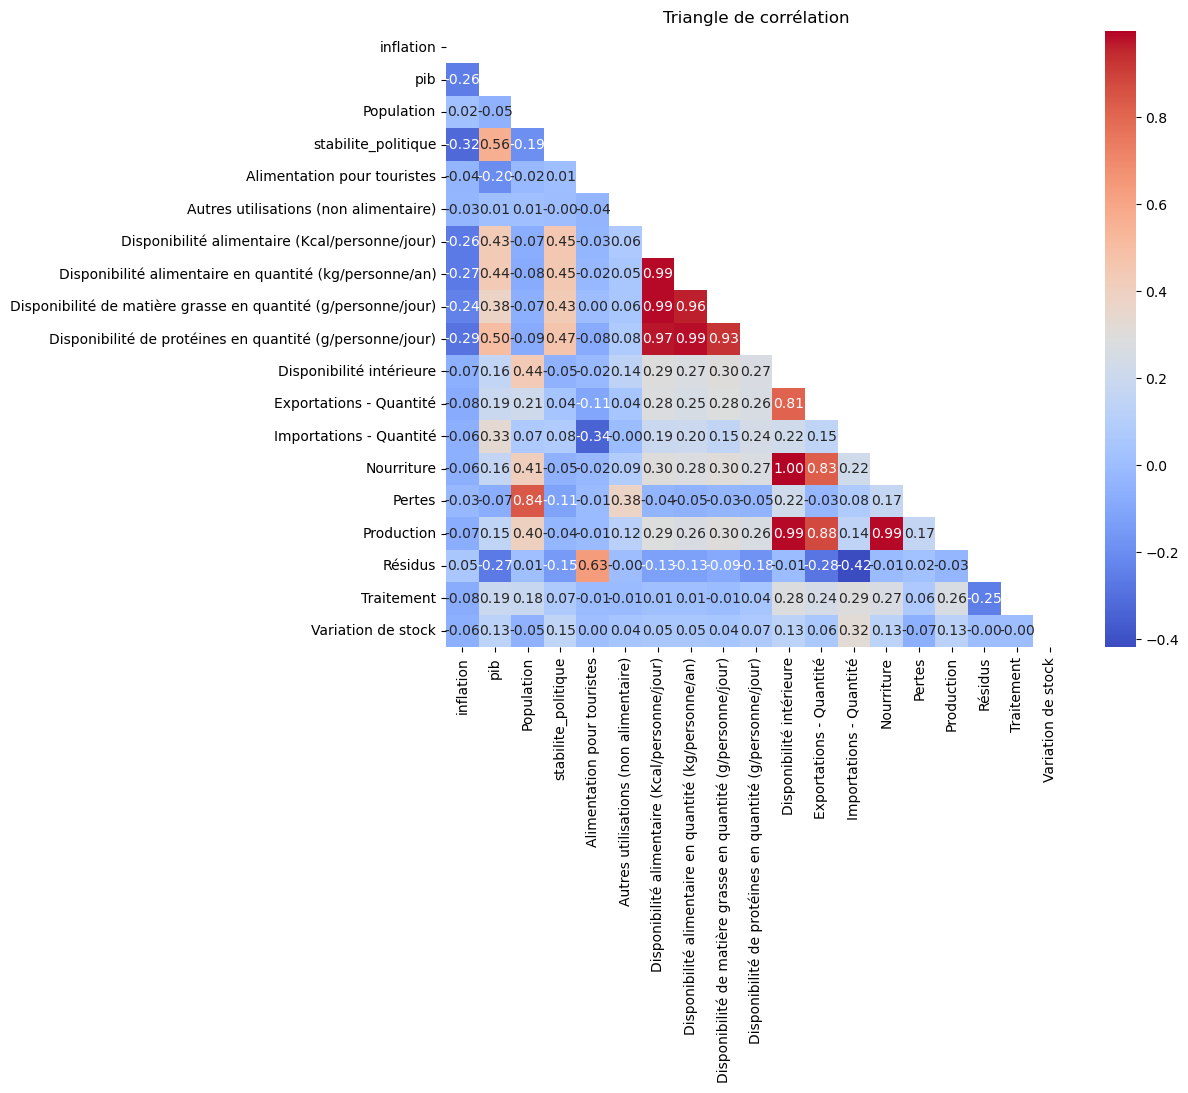

In [60]:
#Affichage du triangle de corrélation
plt.figure(figsize=(10, 8))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Triangle de corrélation')
plt.show()

Je décide de garder ma table finale, avec des variables que je supprime, car celles-ci sont très corrélées entre elles. On peut voir par la suite les variables que j'ai gardés dans mon dataframe final. 

Puis j'ai aussi réduit le nombre de variables afin d'avoir une analyse plus qualitative.

In [61]:
#Choix des variables les plus corrèles.
jointure_total =jointure_total[['Zone', 'inflation','pib','Population','stabilite_politique','Exportations - Quantité','Importations - Quantité','Résidus','Traitement']]
jointure_total

,Zone,inflation,pib,Population,stabilite_politique,Exportations - Quantité,Importations - Quantité,Résidus,Traitement
0,Afghanistan,6.957529,2096.1,36296113.0,-2.80,0.0,29.0,0.0,0.0
1,Afrique du Sud,6.902628,13950.5,57009756.0,-0.28,63.0,514.0,0.0,0.0
2,Albanie,3.924577,12771.0,2884169.0,0.38,0.0,38.0,0.0,0.0
3,Algérie,5.040496,11809.5,41389189.0,-0.92,0.0,2.0,0.0,0.0
4,Allemagne,2.762497,53071.5,82658409.0,0.59,646.0,842.0,-38.0,167.0
...,...,...,...,...,...,...,...,...,...
184,Éthiopie,11.285758,1988.0,106399924.0,-1.68,0.0,1.0,0.0,0.0
185,Îles Salomon,-0.649605,2625.1,636039.0,0.20,0.0,6.0,0.0,0.0
186,Guyana,1.900000,12193.6,775222.0,-0.04,0.0,0.0,0.0,0.0
188,République centrafricaine,4.200000,839.6,4596023.0,-2.01,0.0,4.0,0.0,0.0


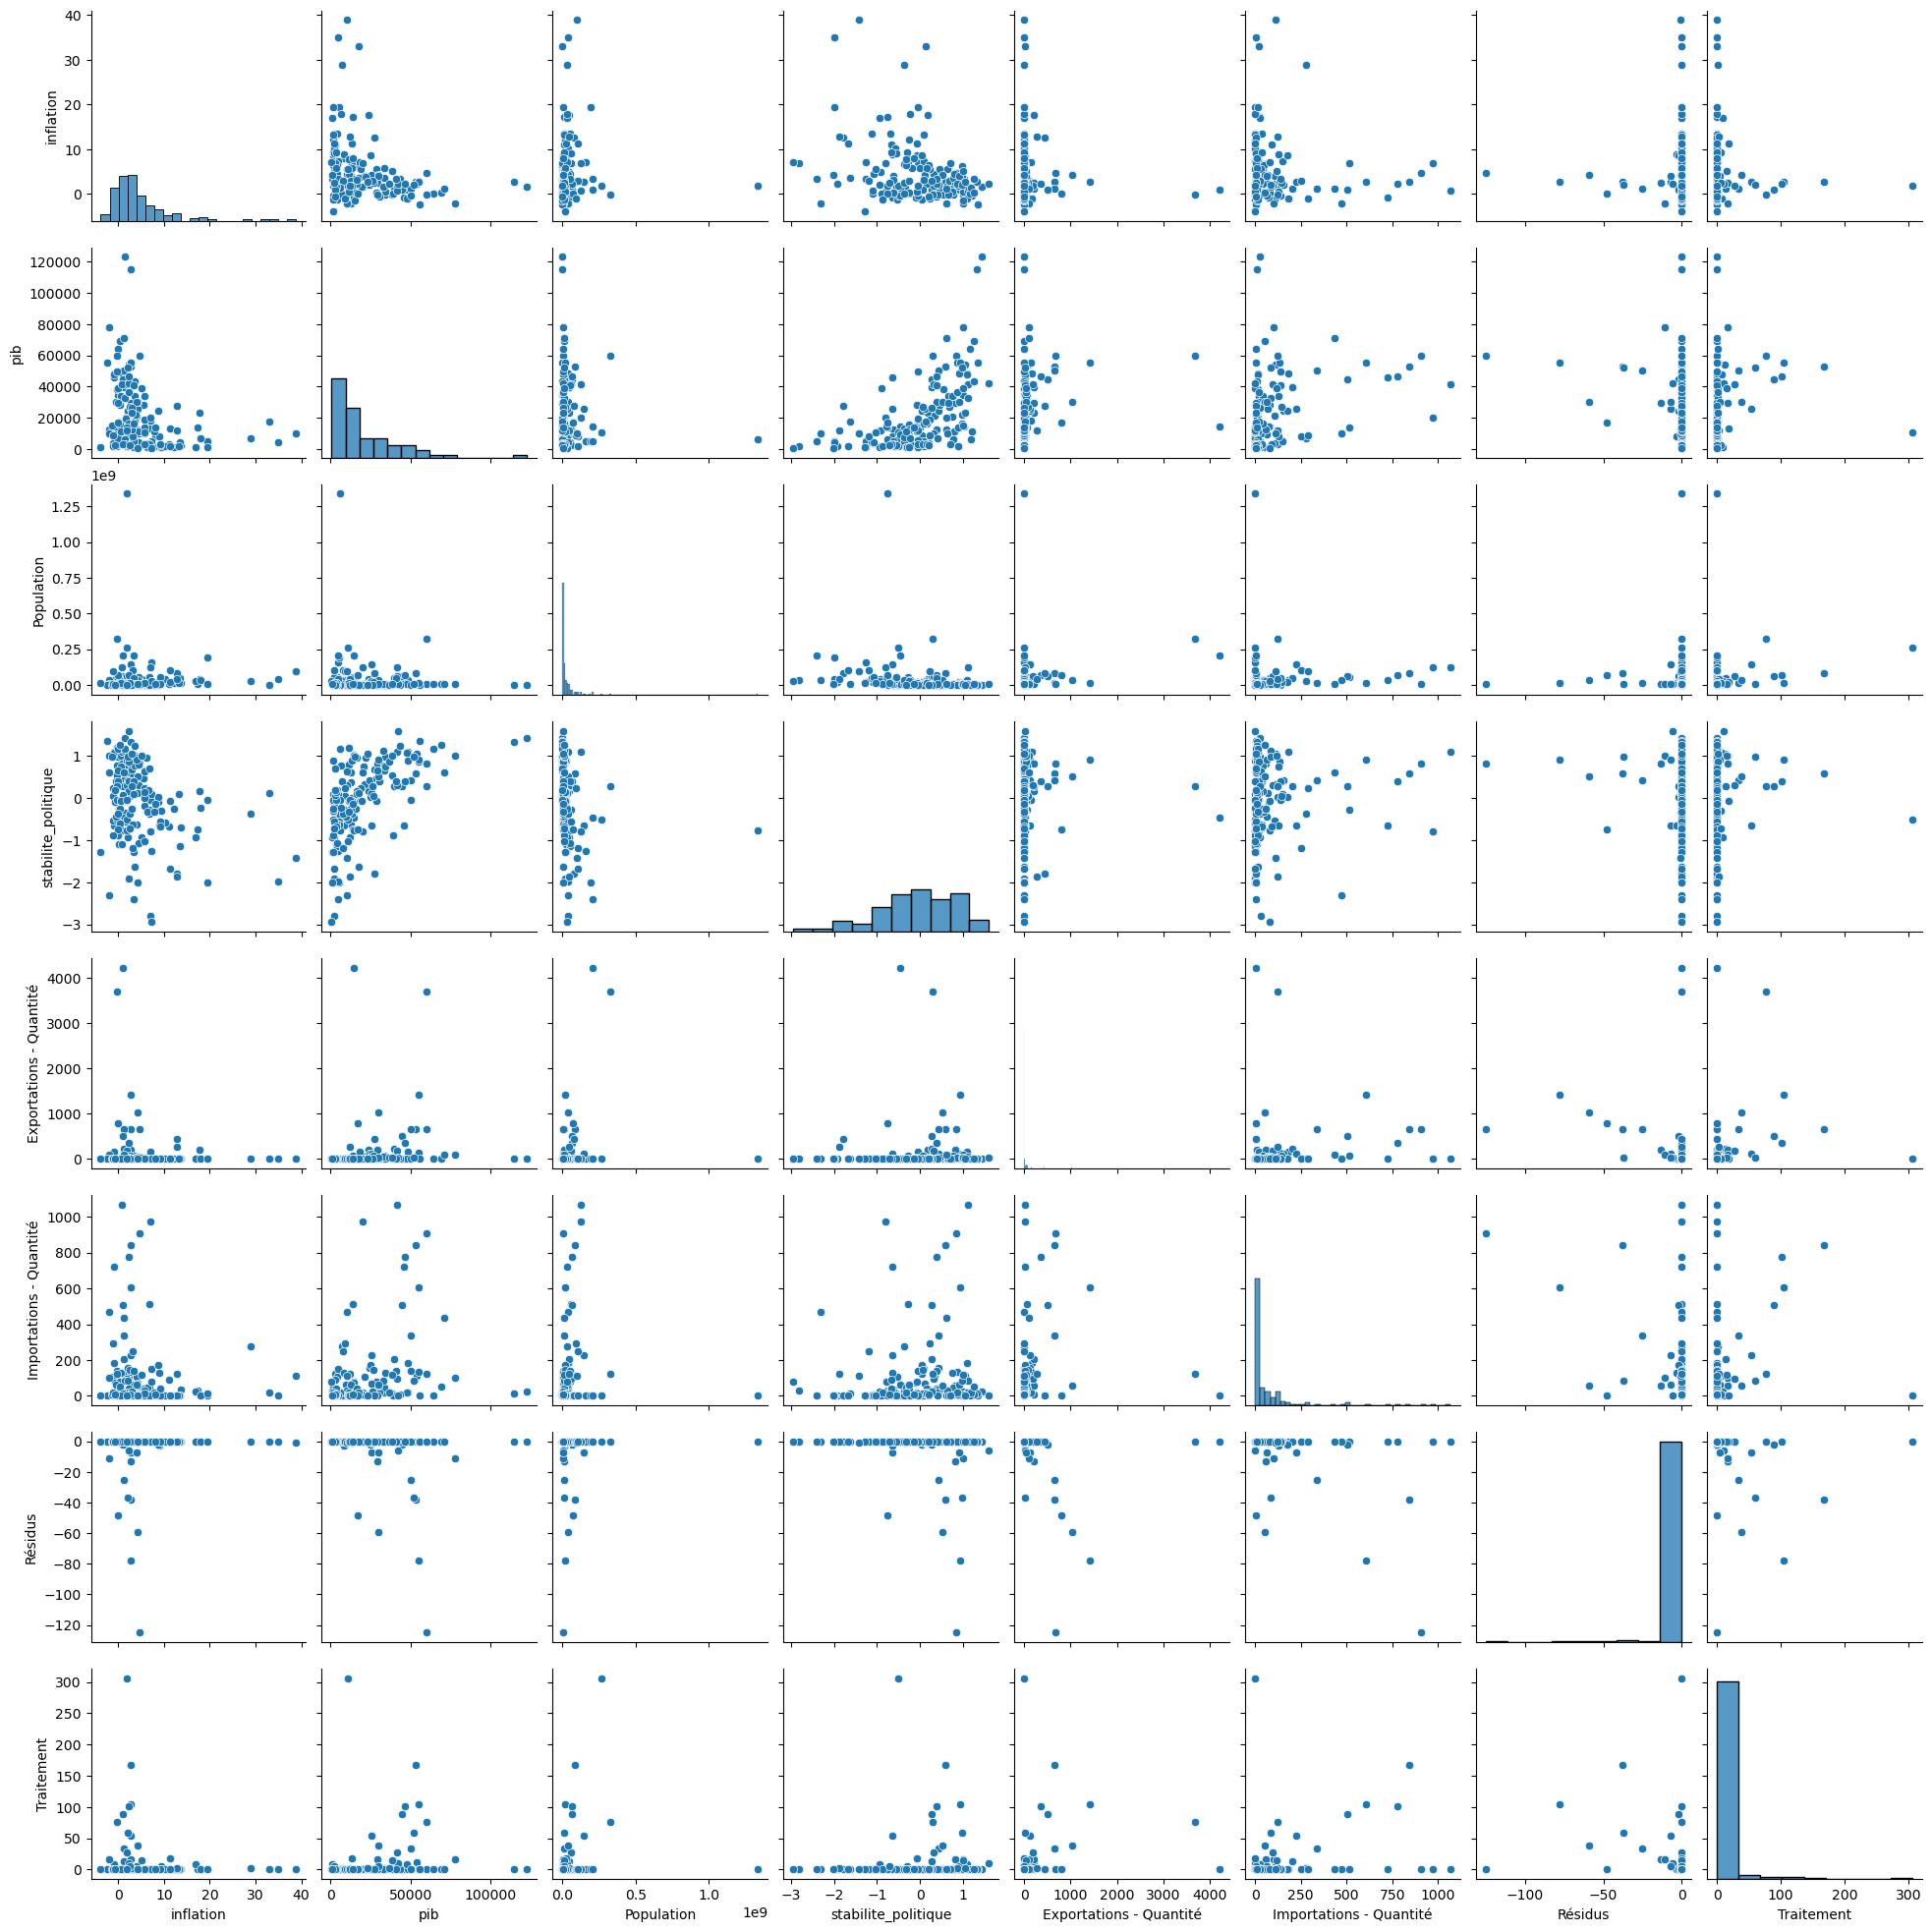

In [62]:
#crée un pairplot
sns.pairplot(jointure_total)
plt.show()

Affichage des variables choisis auparavant, avec un pairplot. L'affichage des variables montrent des variables très corrélés entre elle. Certaines de ces variables ne suivent pas de loi normale. 

In [63]:
#Export du fichier en CSV afin de passer sur la partie clustering
jointure_total.to_csv('jointure_total.csv', index=False)

La première partie du travail se termine ici, avec une table complète sans valeurs manquantes. J'exporte ce fichier en CSV pour continuer mon travail de clustering.

Dans cette partie, j'ai réalisé un travail de nettoyage, j'ai importé les données que je pensais nécessaire pour la suite, j'ai réalisé un travail de jointure pour avoir une table finale.

Ensuite, j'ai travaillé sur la table finale pour être sûr d'avoir des données complètes, des variables pas trop corrélés entre elle pour ne pas avoir de redondance.